# Analysis of Energy Demand

The assignment will focus on data visualisation using pandas library.

### Importing Libraries
Run the cell below first, to import `pandas` and `matplotlib` `pyplot`. The `matplotlib_axes_logger.setLevel('ERROR')` code prevents some unnecessary warnings from showing.

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')




### About the Datasets

In the following section, you will be analysing a datasets from the UK government detailing energy consumption across various sectors of industry. 

The datasets include information about:

- Sector - sectors of industry         
- Sub-Sector - a sector that is part of a larger sector       
- Electricity - energy consumption measured in kilowatt hour (kWh)     
- Natural Gas - energy consumption measured in kilowatt hour (kWh)     
- Oil - energy consumption measured in kilowatt hour (kWh)              
- District Heating - is a system for distributing heat generated in a centralised location through a system of insulated pipes, measured in kilowatt hour (kWh)
- Other - other energy sources measured in kilowatt hour (kWh) 

### Data Collection

Run the following cell to import and concatenate the datasets, assigning the result to DataFrame `data`:

In [4]:
df1 = pd.read_csv('data/heating_2018.csv')
df2 = pd.read_csv('data/hot_water_2018.csv')
df3 = pd.read_csv('data/catering_2018.csv')
data = pd.concat([df1, df2, df3], keys=['Heating', 'Hot Water', 'Catering']).reset_index(level=[0])

Running `data.head()`, `data.sample()` and  `data.info()` will show us how the DataFrame is structured:

In [5]:
data.head()

,level_0,Sector,Sub-Sector,Electricity,Natural Gas,Oil,District Heating,Other
0,Heating,"Arts, leisure and community",Clubs & community centres,14,139,60,8.0,NaN
1,Heating,"Arts, leisure and community",Leisure Centres,5,159,7,18.0,NaN
2,Heating,"Arts, leisure and community",Museums,2,12,3,0.0,NaN
3,Heating,"Arts, leisure and community",Places of Worship,29,377,110,13.0,NaN
4,Heating,"Arts, leisure and community",Theatres,1,35,2,0.0,NaN


In [6]:
data.sample(5)

,level_0,Sector,Sub-Sector,Electricity,Natural Gas,Oil,District Heating,Other
27,Heating,Retail,Large food shops,10,339,0,0.0,NaN
23,Catering,Military,Military storage,0,0,0,NaN,NaN
12,Catering,Emergency Services,Police stations,1,0,0,NaN,NaN
2,Hot Water,"Arts, leisure and community",Museums,0,0,1,0.0,0.0
9,Heating,Education,Uni - Residential,4,58,9,31.0,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 0 to 35
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   level_0           108 non-null    object 
 1   Sector            108 non-null    object 
 2   Sub-Sector        108 non-null    object 
 3   Electricity       108 non-null    int64  
 4   Natural Gas       108 non-null    int64  
 5   Oil               108 non-null    int64  
 6   District Heating  72 non-null     float64
 7   Other             36 non-null     float64
dtypes: float64(2), int64(3), object(3)
memory usage: 7.6+ KB


### Data Processing

**Q1.** First of all, let's tidy up the `data` DataFrame:

- Use the `.rename()` method to change the name of the `level_0` column to `Use`
- Use the `.fillna()` method to update all `NaN` values to `0`
- Use the `.astype()` method to convert all numerical columns `['Electricity', 'Natural Gas', 'Oil', 'District Heating', 'Other']` to integers
- Use the `.sum(axis=1)` method to create a new column `Total` which contains the sum of all numerical columns



In [8]:

data = data.rename(columns={'level_0': 'Use'})
data = data.fillna(0)
numerical_columns = ['Electricity', 'Natural Gas', 'Oil', 'District Heating', 'Other']
data[numerical_columns] = data[numerical_columns].astype(int)
data['Total'] = data[numerical_columns].sum(axis=1)




### Data Grouping

**Q2.** Create a new DataFrame called `ss`, using `.groupby()` to group DataFrame `data` by column `'Sub-Sector'`, which contains the `.sum()` for each of the numerical (energy type) columns for each group:


In [9]:

ss = data.groupby(by=['Sub-Sector']).sum()



**Q3.** Create a new DataFrame called `use`, using `.groupby()` to group DataFrame `data` by column `'Use'`, which contains the `.sum()` for each of the numerical (energy type) columns for each group:


In [10]:

use = data.groupby(by=['Use']).sum()



**Q4.** Create a new DataFrame called `sector`, using `.groupby()` to group DataFrame `data` by column `'Sector'`, and make use of `.agg()` method on the `Total` column such that the new DataFrame has columns for `'sum'`, `'mean'`, and `'count'` of the values in `'Total'`:


In [11]:

sector = data.groupby(by='Sector')['Total'].agg(['sum', 'mean', 'count'])
sector = sector.sort_values(by='sum', ascending=False)



*You may want to submit your notebook to KATE to ensure your `data`, `ss`, and `use` and `sector` DataFrames are as expected before moving on to the visualisations.*

### Data Visualisation

**Q5.** Refer to the `ss` DataFrame.

Create a **histogram** from the `Electricity` column of `ss` DataFrame using the `.plot()` method: `ss['Electricity']`
- The histogram should have 5 `bins`
- Assign the plot to the variable `elec_hist`
- Ensure your code cell starts with `plt.figure()`


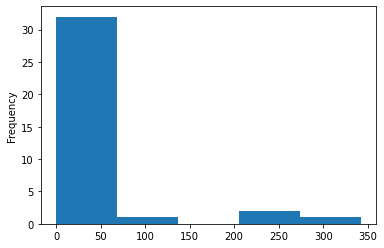

In [12]:

plt.figure() 
elec_hist = ss['Electricity'].plot(kind='hist', bins=5);



**Q6.** Refer to the `ss` DataFrame.

Create a **scatter plot** of `Natural Gas` vs `Total`, to see the relationship between the two columns of `ss` DataFrame.

- Use the `.plot()` method on `ss` DataFrame
- Have `Natural Gas` on the `x-axis` and `Total` on the `y-axis`
- Assign the plot to the variable `gas_total`
- Ensure your code cell starts with `plt.figure()`


Text(0.5, 1.0, 'Scatter plot of Natural Gas vs Total')

<Figure size 432x288 with 0 Axes>

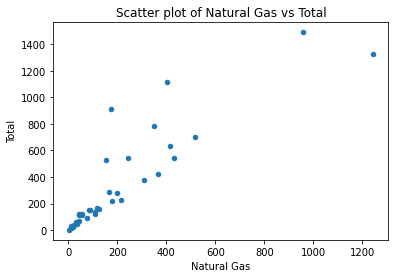

In [13]:

plt.figure()
gas_total = ss.plot(x='Natural Gas', y='Total', kind='scatter')
plt.xlabel('Natural Gas')  
plt.ylabel('Total')        
plt.title('Scatter plot of Natural Gas vs Total')



**Q7.** Refer to the `sector` DataFrame. 

Create a **vertical bar chart** of the `'sum'` column of the `sector` DataFrame using the `.plot()` method: `sector['sum']`

- Add a title of `'Energy consumption by sector'` to the plot
- Assign the plot to the variable `sector_sum`
- Ensure your code cell starts with `plt.figure()`


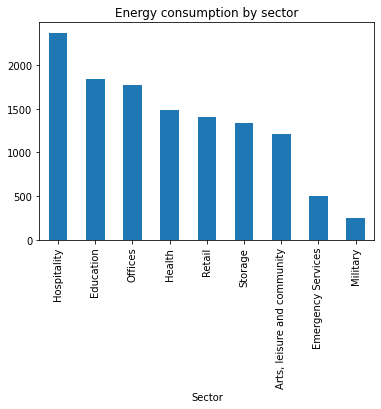

In [14]:

plt.figure()
sector_sum = sector['sum'].plot(kind='bar', title='Energy consumption by sector');



**Q8.** Refer to the given `new_df_use` DataFrame, which is identical to the `use` DataFrame but excludes the `Total` column (see below for the code).

Create a *horizontal* and *stacked* bar chart from the `new_df_use` DataFrame, using the `.plot()` method:

- Assign the plot to the variable `use_type`
- Give it a `figsize` of `(12,12)`
- You may find [this page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) useful
- Ensure your code cell starts with `plt.figure()`


In [15]:
new_df_use = use.loc[:, ['Electricity', 'Natural Gas', 'Oil', 'District Heating', 'Other']]
new_df_use.head()

,Electricity,Natural Gas,Oil,District Heating,Other
Use,,,,,
Catering,758,587,800,0,0
Heating,762,6044,1602,265,0
Hot Water,160,801,257,17,109


<Figure size 432x288 with 0 Axes>

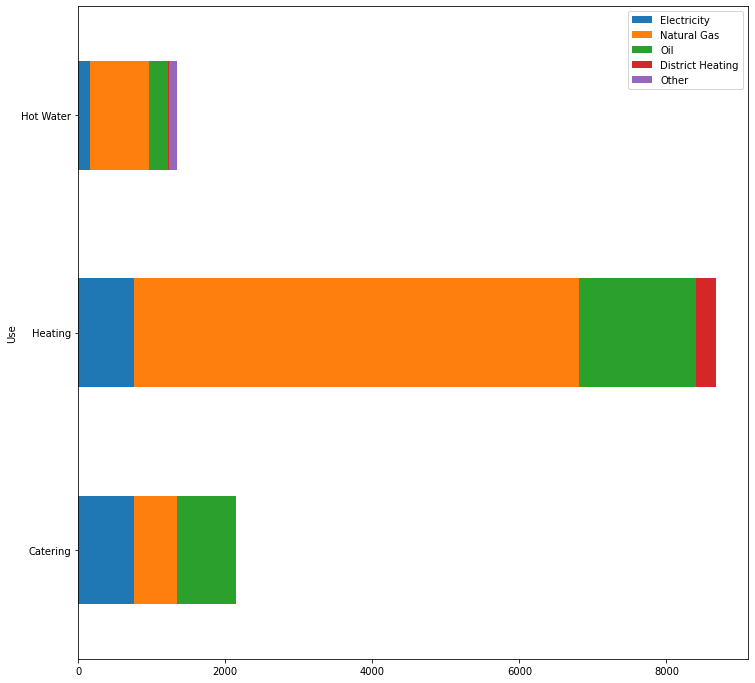

In [16]:

plt.figure()
use_type = new_df_use.plot.barh(stacked=True, figsize=(12,12));



This project focused on the UK energy consumption datasets from various different industries using the pandas library for plotting different visualisations. Firstly I uploaded the required python libraries for this project and then loaded the datasets into various different dataframes which were suitable for plotting different visualisations. I then set out to plot the frequency histogram for electricity. My next task was to plot a scatter graph of the Natural Gas vs Total to visually portray the relationship between these two columns in the dataframes which was a positive correlation. I then plotted a vertical bar graph showing the energy consumption by each industry sector finding that the hospitality sector consumed the most energy and the military sector consumed the least amount of energy. My last task in this project was to create a horizontal and stacked bar chart without the Total column displaying the frequency of use for different types of energy in catering, heating and hot water. This chart showed that Natural Gas is used quite often as an energy source for heating and hot water whereas oil and electricity are the more common energy sources used for catering. 

By undertaking this project I was able to visualise the energy data in different ways in order to portray the insights from the data and gain a stronger understanding of the relationships between different energy sources and the industries they are used in. I learnt how to use the pandas library to my advantage in order to clearly visualise different patterns and relationships amongst the energy datasets.